In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Task - 1: Import the "Retail_Sales_Data.csv" dataset.

In [3]:
df = pd.read_csv("retail_sales_dataset.csv")

# Task - 2: Explore the dataset to understand its structure and content.

In [5]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [8]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [12]:
# Check for missing values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

# Task - 3: Identify the relevant variables for aggregating sales data, such as region, sales amount, and product category.

In [18]:
# Step 1: Identify relevant columns
relevant_columns = ['Product Category', 'Quantity', 'Total Amount']
data = df[relevant_columns]
data

,Product Category,Quantity,Total Amount
0,Beauty,3,150
1,Clothing,2,1000
2,Electronics,1,30
3,Clothing,1,500
4,Beauty,2,100
...,...,...,...
995,Clothing,1,50
996,Beauty,3,90
997,Beauty,4,100
998,Electronics,3,150


# Task - 4: Group the sales data by region and calculate the total sales amount for each region

In [47]:
#Selecting Product Category in place of Region for grouping sales data makes sense if your goal is to analyze sales performance by product type rather than by geographical location
region_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index()

In [49]:
region_sales = region_sales.sort_values(by='Total Amount', ascending=False)

# Task -5: Create bar plots or pie charts to visualize the sales distribution by region.

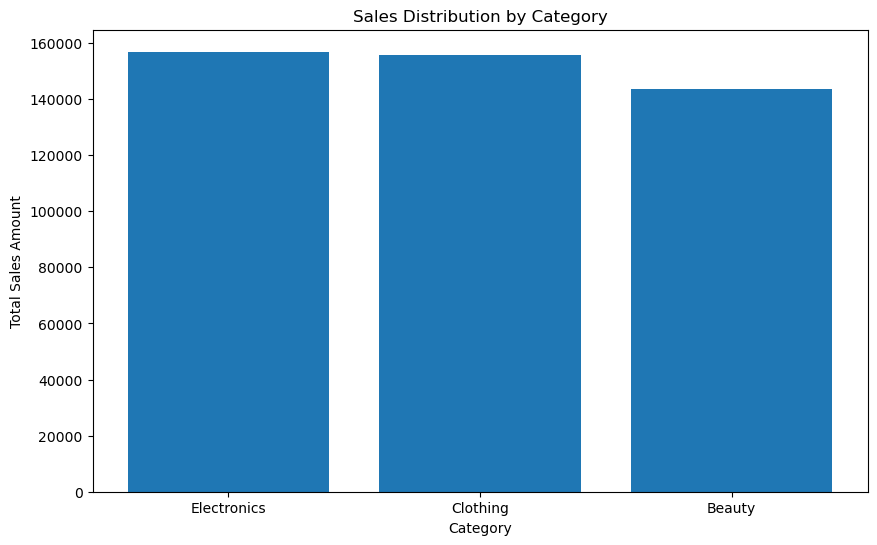

In [54]:
# Bar plot
plt.figure(figsize=(10,6))
plt.bar(region_sales['Product Category'], region_sales['Total Amount'])
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')
plt.show()

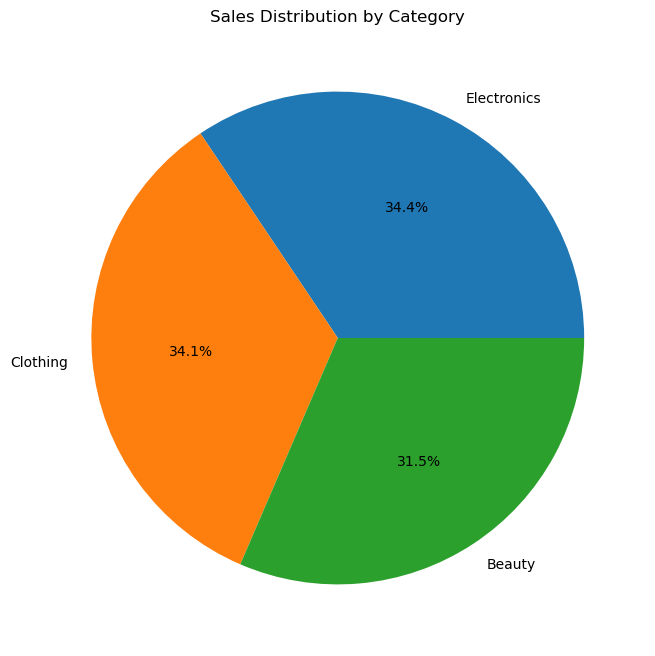

In [56]:
# Pie chart
plt.figure(figsize=(8,8))
plt.pie(region_sales['Total Amount'], labels=region_sales['Product Category'], autopct='%1.1f%%')
plt.title('Sales Distribution by Category')
plt.show()

# Task - 6: Identify the top-performing regions based on the highest sales amount.

In [64]:
# Step 6: Identify the top-performing regions based on the highest sales amount
top_regions = region_sales.sort_values('Total Amount', ascending=False)  # Sort regions by sales amount


print(top_regions)  # Show the sorted top-performing regions

  Product Category  Total Amount
2      Electronics        156905
1         Clothing        155580
0           Beauty        143515
